In [1]:
from photon_analyzer import *
from scipy.special import factorial as fact
import scipy.optimize as op
import uncertainties as unc
import sympy

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
#     'font.size' : 14.4,
    'font.size' : 17.28,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
vt0 = read_data('Thermal/Part_0.txt')
print(vt0[-1,0]*81*10**(-12))

2.392296534153


In [3]:
vc0 = read_data('Coherent/Part_0.txt')
print(vc0[-1,0]*81*10**(-12))

1.547291726109


<IPython.core.display.Javascript object>


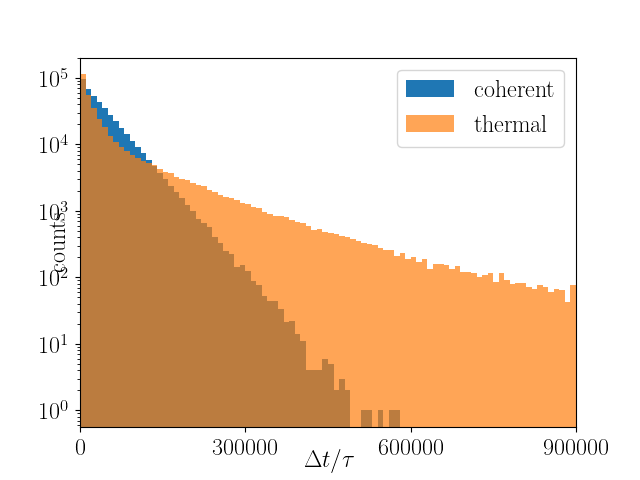

In [21]:
%matplotlib notebook
timestep = 1e4
t_diff_t,bins_t = time_difference_histo(vt0,timestep=timestep,plot=False)
t_diff_c,bins_c = time_difference_histo(vc0,timestep=timestep,plot=False)

v_t, b_t, pattume = 

fig,ax = plt.subplots()
ax.hist(t_diff_c,bins=bins_c,log= True,alpha=1, label='coherent')
ax.hist(t_diff_t,bins=bins_t,alpha=0.7, label='thermal')
ax.set_xlim(0,9e5)

ax.legend()
ax.set_xlabel(r'$\Delta t/\tau$')
ax.set_ylabel('counts')
ax.xaxis.set_ticks([0,300000,600000,900000])
ax.xaxis.set_label_coords(0.5,-0.06)
ax.yaxis.set_label_coords(-0.02,0.5)

# ax.yaxis.set_ticklabels([])

fig.savefig('report/img/time_difference_histo_0.pgf')

<IPython.core.display.Javascript object>


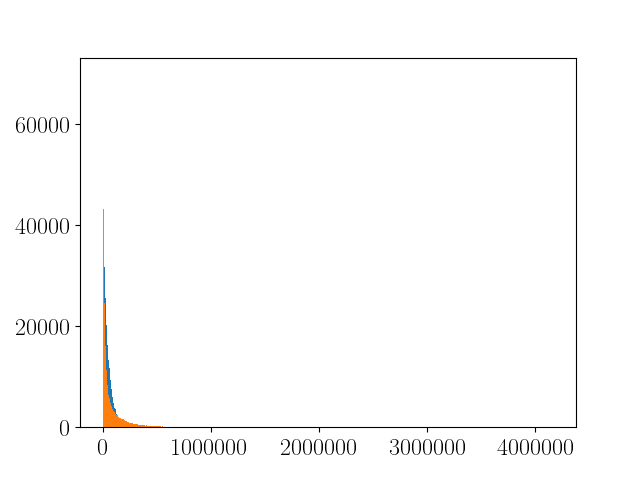

<IPython.core.display.Javascript object>


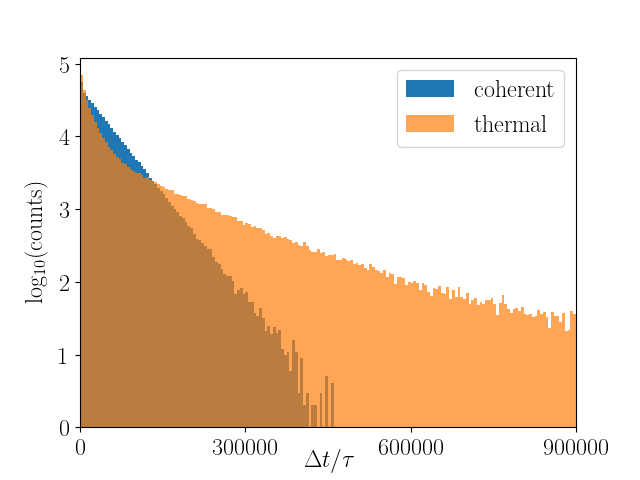

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


In [29]:
%matplotlib notebook
timestep = 5e3
t_diff_t,bins_t = time_difference_histo(vt0,timestep=timestep,plot=False)
t_diff_c,bins_c = time_difference_histo(vc0,timestep=timestep,plot=False)

v_c, b_c, pattume = plt.hist(t_diff_c,bins=bins_c)
v_t, b_t, pattume = plt.hist(t_diff_t,bins=bins_t)

fig,ax = plt.subplots()
ax.hist(b_c[:-1],bins=b_c,weights=np.log10(v_c),alpha=1, label='coherent')
ax.hist(b_t[:-1],bins=b_t,weights=np.log10(v_t),alpha=0.7, label='thermal')
ax.set_xlim(0,9e5)

ax.legend()
ax.set_xlabel(r'$\Delta t/\tau$')
ax.set_ylabel('log$_{10}$(counts)')
ax.xaxis.set_ticks([0,300000,600000,900000])
ax.xaxis.set_label_coords(0.5,-0.06)
ax.yaxis.set_label_coords(-0.06,0.5)

# ax.yaxis.set_ticklabels([])

fig.savefig('report/img/time_difference_histo_0.pgf')

In [2]:
def expo(x,a,N):
    return N*np.exp(-a*x)

def poisson(x,a,N):
    return N*a**x*np.exp(-a)/fact(x)

def gaus(x,mu,sigma,N):
    return N/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

<IPython.core.display.Javascript object>


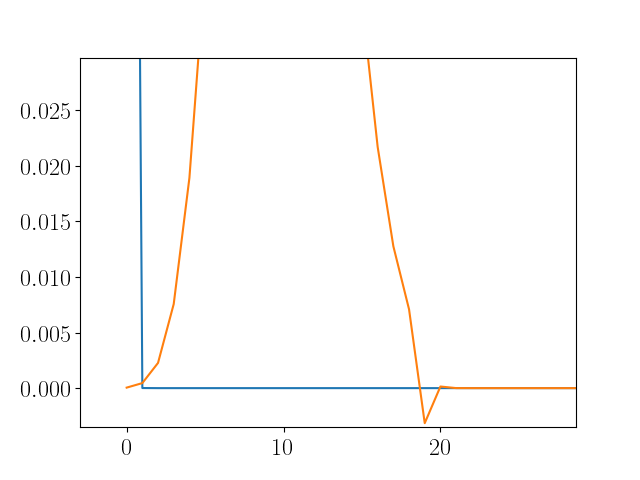

In [67]:
%matplotlib notebook
xs = np.arange(0,100)
plt.figure()
plt.plot(xs,expo(xs,10,0.2))
plt.plot(xs,poisson(xs,10,1))
plt.show()

<IPython.core.display.Javascript object>


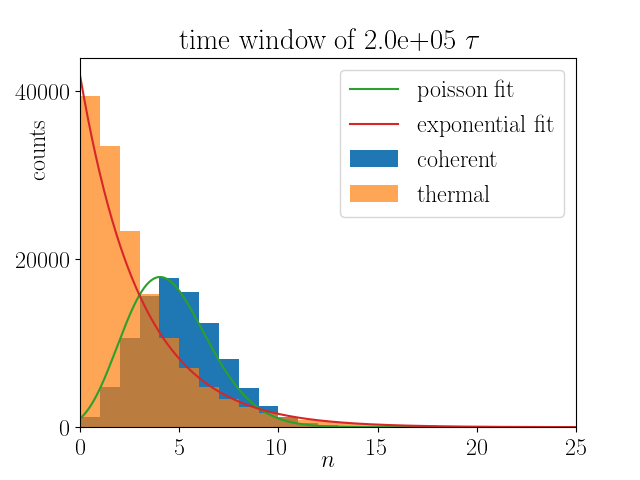

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [99]:
%matplotlib notebook
timestep = 2e5
xmax = 25
xs_fine = np.linspace(0,xmax,1000)

rates_c,bins_c = photon_rate_histo(vc0,timestep=timestep,plot=False)
rates_t,bins_t = photon_rate_histo(vt0,timestep=timestep,plot=False)

fig,ax = plt.subplots()
ns_c, bins, pattume = ax.hist(rates_c,bins=bins_c,log=False,alpha=1, label='coherent')
ns_t, bins, pattume = ax.hist(rates_t,bins=bins_t,log=False,alpha=0.7, label='thermal')

popt_c,pcov_c = op.curve_fit(poisson, bins_c[:-1],ns_c,p0=[20,1000])
popt_t,pcov_t = op.curve_fit(expo, bins_t[:-1],ns_t,p0=[20,1000])

ax.plot(xs_fine, poisson(xs_fine,*popt_c),label='poisson fit')
ax.plot(xs_fine, expo(xs_fine, *popt_t), label='exponential fit')

ax.set_xlim(0,xmax)

ax.legend()
ax.set_xlabel('$n$')
ax.set_ylabel('counts')
plt.locator_params(axis='y', nbins=4)
ax.xaxis.set_label_coords(0.5,-0.06)
ax.yaxis.set_label_coords(-0.06,0.75)
ax.set_title(r'time window of %.1e $\tau$' %timestep)

# fig.savefig('report/img/rate_histo_0_fit_w_%.1e.pgf' %timestep)

In [77]:
len(plt.hist(rates_c,bins=bins_c,log=False,alpha=1, label='coherent'))

3

In [30]:
phys_s = photon_random_string(vc0,window_lenght=16)
pseudo_s = pseudo_random_string(len(phys_s))

<IPython.core.display.Javascript object>


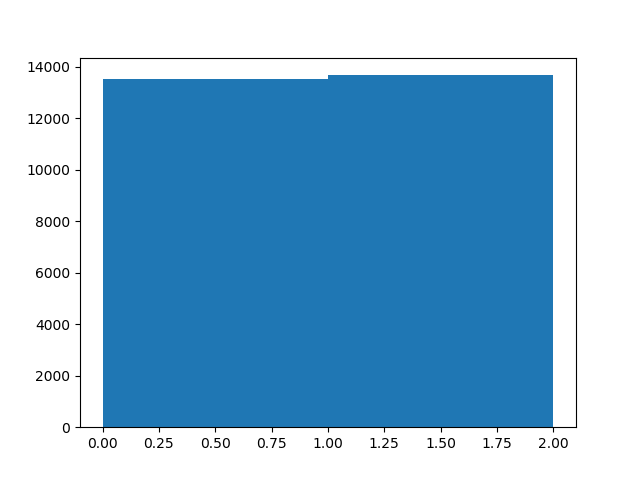

(array([13540., 13672.]), array([0, 1, 2]), <a list of 2 Patch objects>)

In [31]:
s = phys_s
n_bits = 1
plt.figure()
plt.hist(binary_to_int(s,n_bits), bins = np.arange(0,2**n_bits + 1))

<IPython.core.display.Javascript object>


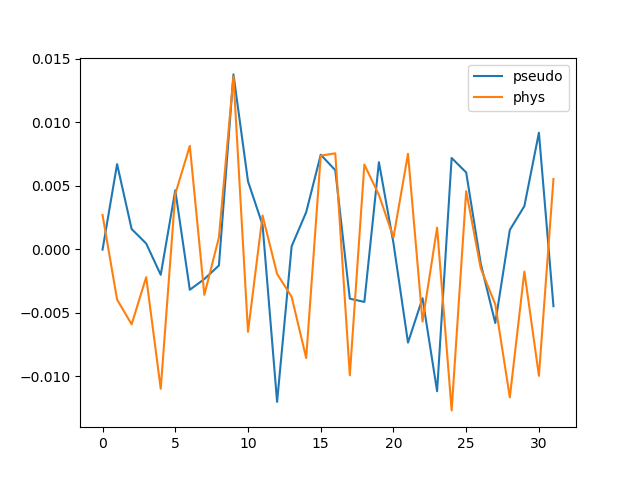

0.0007145579670277133 0.00574512265972695 -0.000834473757686291 0.006666097581855635


In [32]:
pseudo_a = ACF(pseudo_s,32)[1:]
phys_a = ACF(phys_s,32)[1:]
plt.figure()
plt.plot(np.arange(len(pseudo_a)),pseudo_a, label = 'pseudo')
plt.plot(np.arange(len(phys_a)),phys_a, label = 'phys')
plt.legend()
plt.show()
print(np.mean(pseudo_a), np.sqrt(np.var(pseudo_a)), np.mean(phys_a), np.sqrt(np.var(phys_a)))

## Photon indivisibility

In [3]:
data_pd = pd.read_csv('Photon_indivisibility.txt',sep=';',skiprows=3,
                             header=0,names=['timetag','channel'],dtype=np.int)
data = data_pd.values
print(len(data))
print((data[-1,0] - data[0,0])*80.955/10**12)

3611424
44.997868141558925


100%|██████████| 3611424/3611424 [00:24<00:00, 147470.48it/s]


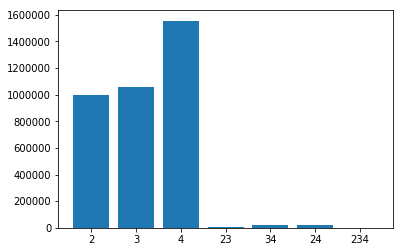

[('2', 1000385) ('3', 1056698) ('4', 1554341) ('23',    3838)
 ('34',   20221) ('24',   20848) ('234',     147)]

g2_with_herald =  0.5419966597607565

g2_without_herald =  0.007468591893090785


In [11]:
coinc = coincidences(data,10**3)
plot_coincidences(coinc)
c = coinc['count']
g2_with_herald = c[2]*c[6]*1./(c[4]*c[5])
g2_without_herald = c[3]*(c[0] + c[1])*1./(c[0]*c[1])

print(coinc)
print('\ng2_with_herald = ',g2_with_herald)
print('\ng2_without_herald = ',g2_without_herald)


In [5]:
np.sqrt(1056698)

1027.9581703551949

In [4]:
time_delays = delay_distribution(data,neighbors=5,tolerance=30,biases = [54.4,21.6,0])

100%|██████████| 3611404/3611404 [01:47<00:00, 33737.59it/s]


<IPython.core.display.Javascript object>


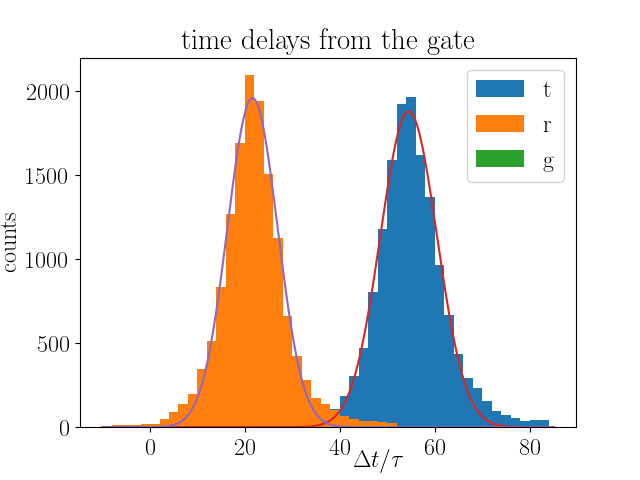

[5.44895969e+01 5.95735656e+00 2.80931049e+04]
[2.15928842e+01 5.28414976e+00 2.59748923e+04]


In [5]:
%matplotlib notebook
xmin, xmax = -10,85
bins = np.arange(xmin,xmax,2)

fig,ax = plt.subplots()
v_2,b,pattume = ax.hist([d for d in time_delays[:,0] if d != 0],bins = bins, label='t')
v_3,b,pattume = ax.hist([d for d in time_delays[:,1] if d != 0], bins = bins, label='r')
v_4,b,pattume = ax.hist([d for d in time_delays[:,2] if d != 0], bins = bins, label='g')


xs = []
for i,b in enumerate(bins[:-1]):
    xs.append((b + bins[i+1])/2)
xs = np.array(xs)

xs_fine = np.linspace(xmin,xmax,500)

popt_2,pcov_2 = op.curve_fit(gaus, xs, v_2, p0 = (20,8,10000))
popt_3,pcov_3 = op.curve_fit(gaus, xs, v_3, p0 = (50,8,10000))

ax.plot(xs_fine,gaus(xs_fine,*popt_2))
ax.plot(xs_fine,gaus(xs_fine,*popt_3))


ax.legend()
ax.set_xlabel(r'$\Delta t/\tau$')
ax.set_ylabel('counts')
ax.set_title('time delays from the gate')
ax.xaxis.set_label_coords(0.6,-0.06)

# fig.savefig('report/img/delays.pgf')

print(popt_2)
print(popt_3)

In [6]:
len([d for d in time_delays[:,2] if d != 0])

0

In [8]:
N_4_v = len(time_delays)
N_24_v = len([d for d in time_delays[:,0] if d != 0])
N_34_v = len([d for d in time_delays[:,1] if d != 0])
N_234_v = len([d for d in time_delays if not 0 in d[:-1]])

N_4 = unc.ufloat(N_4_v,np.sqrt(N_4_v))
N_24 = unc.ufloat(N_24_v,np.sqrt(N_24_v))
N_34 = unc.ufloat(N_34_v,np.sqrt(N_34_v))
N_234 = unc.ufloat(N_234_v,np.sqrt(N_234_v))

g2 = N_234*(N_4)*1./(N_24*N_34)

print(N_4,N_24,N_34,N_234,g2)

(1.5543+/-0.0012)e+06 (1.485+/-0.012)e+04 (1.392+/-0.012)e+04 3.0+/-1.7 0.023+/-0.013


In [9]:
N_2 = unc.ufloat(1000385,np.sqrt(1000385))
N_3 = unc.ufloat(1056698,np.sqrt(1056698))

In [7]:
np.sqrt(13920)

117.983049630021

# Real detectors

In [19]:
t_tot = 45
dt = 2*2.43e-09
p_g = N_4*dt/t_tot
p_t = (N_2 + N_3)*dt/(2*t_tot)
p_gr = (N_24 + N_34)*dt/(2*t_tot)
p_g, p_t, p_gr

(0.000167868072+/-1.3464676667488157e-07,
 0.000111082482+/-7.744968707490044e-08,
 1.553364e-06+/-9.158692919843966e-09)

In [11]:
ne = 2*(p_g - p_t)
g = 2*p_t - p_g
ne,g

(0.00011357118000000001+/-3.1066513035099386e-07,
 5.4296891999999997e-05+/-2.0524026868039321e-07)

In [22]:
e = (p_gr + 1.5*g*ne - g**2)/(0.5*ne*(1 + 2*g))
n_r = ne/(e*dt)
g_r = g/dt
e,n_r,g_r

(0.02746288871970349+/-0.00017780323102950857,
 850913.9659000834+/-6824.066173431109,
 11172.199999999999+/-42.23050795892864)

<IPython.core.display.Javascript object>


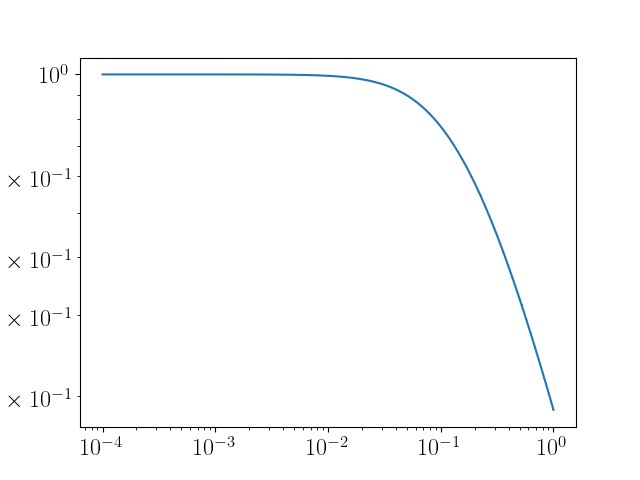

<ErrorbarContainer object of 3 artists>

In [48]:
es = 10**np.linspace(-4,0,100)
ne = 0.001*g

g2s = []
for e in es:
    g2s.append( 4*g*(ne + g)*(g**2 + ne*(e + 2*(1 - e)*g))/(2*g**2 + ne*(e + (3 - 2*e)*g))**2 )
    
plt.figure()
plt.errorbar(es,[g2.n for g2 in g2s],yerr=[g2.s for g2 in g2s])
    

<IPython.core.display.Javascript object>


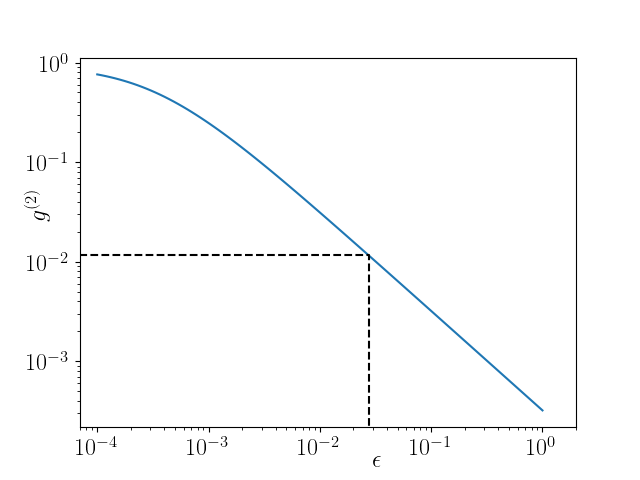

In [45]:
fig, ax = plt.subplots()
ax.loglog(es,[g2.n for g2 in g2s])

e = 0.02746
g2 = 4*g*(ne + g)*(g**2 + ne*(e + 2*(1 - e)*g))/(2*g**2 + ne*(e + (3 - 2*e)*g))**2

ax.plot([e,e,1e-5],[0,g2.n,g2.n],color='black', linestyle='dashed')
ax.set_xlim(7e-5,2)

ax.set_xlabel(r'$\epsilon$')
ax.set_ylabel('$g^{(2)}$')
ax.xaxis.set_label_coords(0.6,-0.06)
ax.yaxis.set_label_coords(-0.06,0.6)
# plt.locator_params(axis='y', nbins=6)


fig.savefig('report/img/g2.pgf')

In [15]:
def p_gt(e):
    return e/2*ne + (3 - 2*e)/2*ne*g + (1 - (3 - e)/2*ne)*g**2

def p_gtr_c(e):
    return ne/4*(e**2 + 3*e*(2-e)*g + 3*(1-e)*(3-e)*g**2 - (3-e)**2*g**3) + g**3

<IPython.core.display.Javascript object>


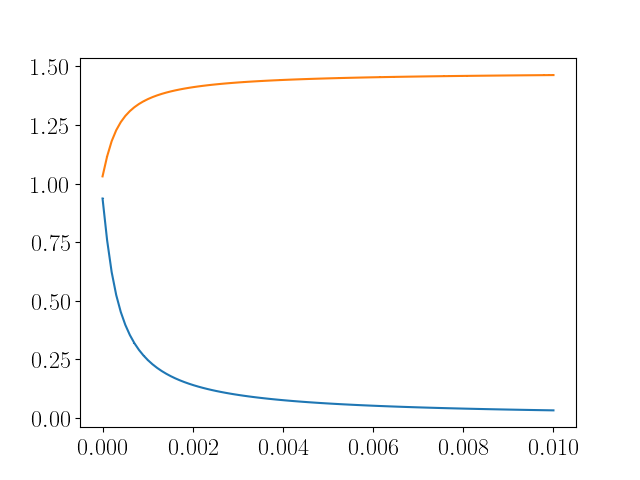

<ErrorbarContainer object of 3 artists>

In [18]:
g2s_c = []
for e in es:
    g2s_c.append( p_g*p_gtr_c(e)/(p_gt(e)**2) )
    
plt.figure()
plt.errorbar(es,[g2.n for g2 in g2s],yerr=[g2.s for g2 in g2s])
plt.errorbar(es,[g2.n for g2 in g2s_c],yerr=[g2.s for g2 in g2s_c])